In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 



In [2]:
data = pd.read_csv('../datasets/titanic_data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

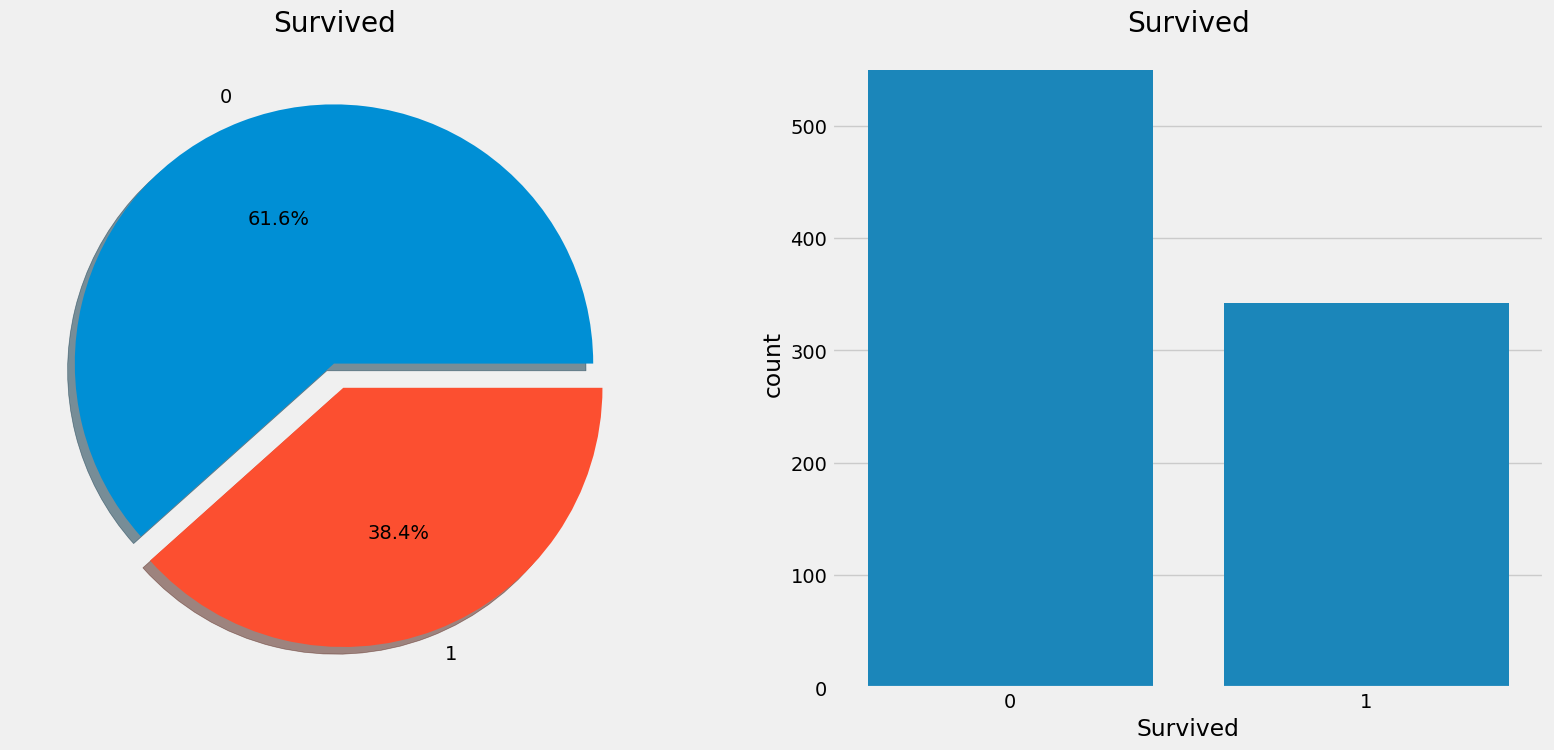

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

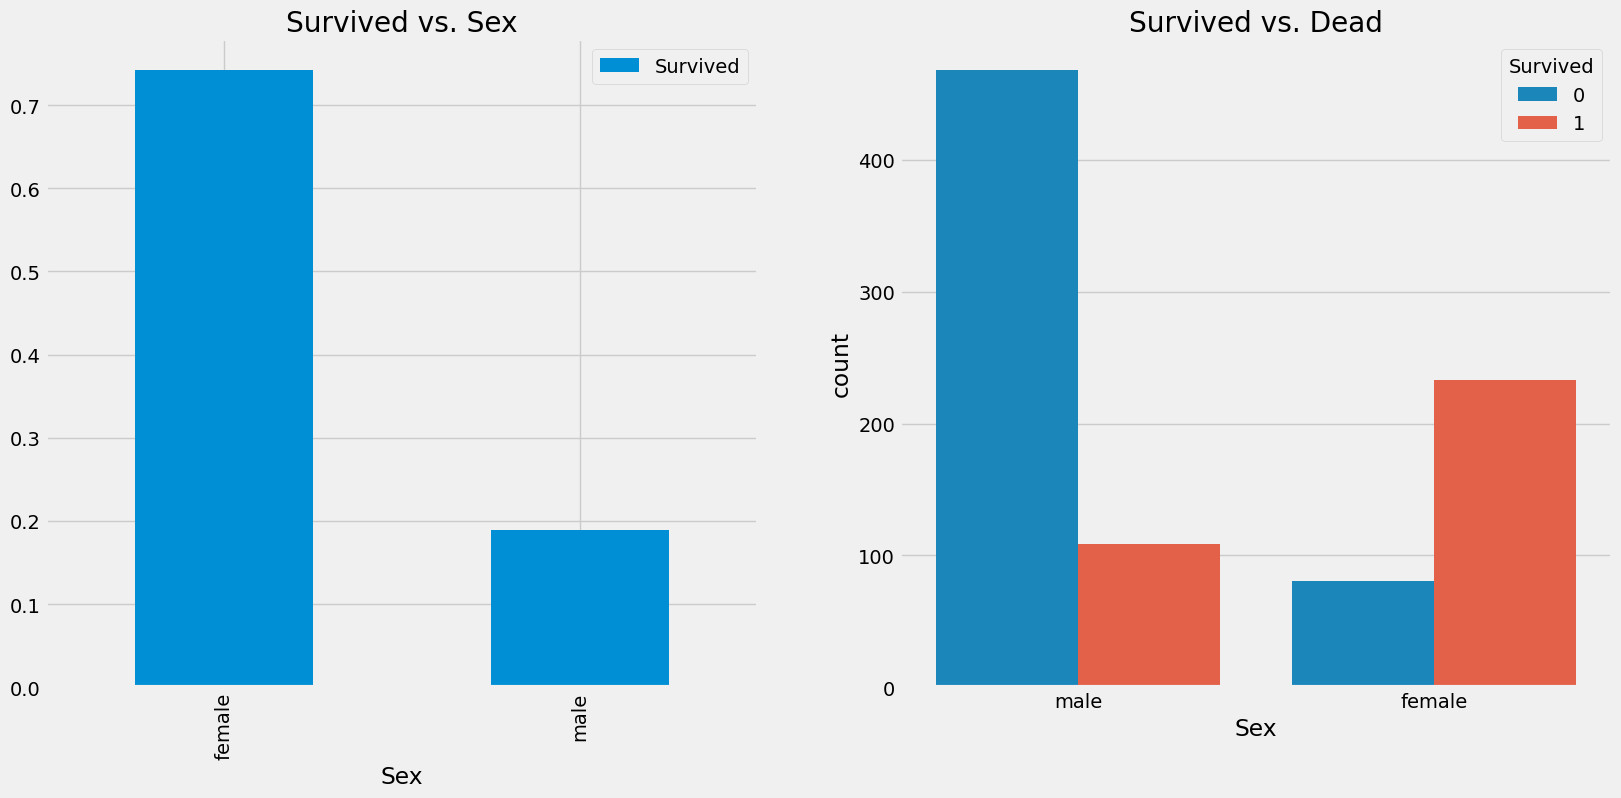

In [7]:
# categorical feature check
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survived vs. Dead')
plt.show()


In [8]:
# ordinal feature check

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient()


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


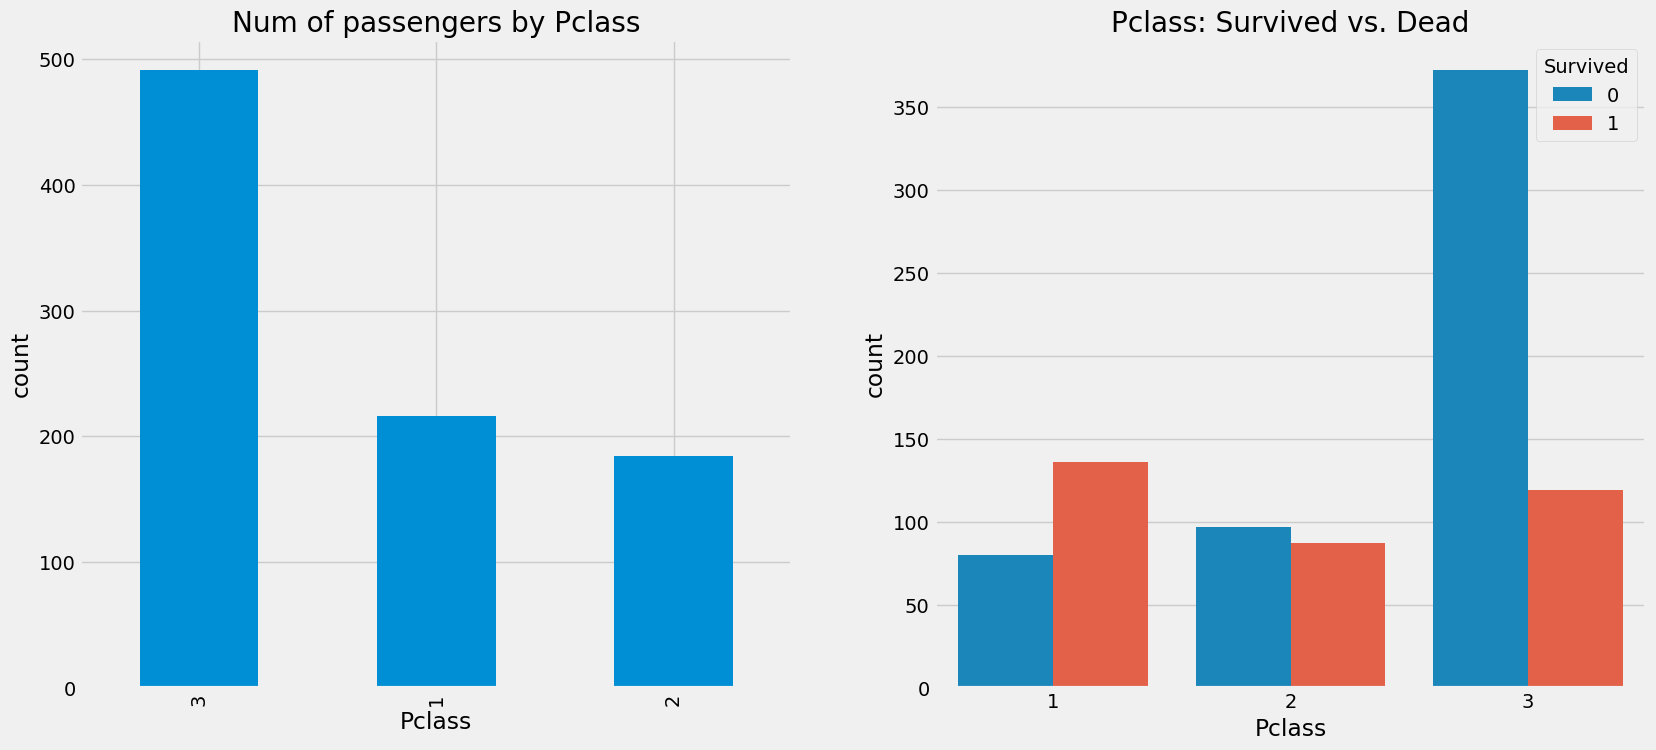

In [9]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Num of passengers by Pclass')
ax[0].set_ylabel('count')
sns.countplot(x='Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient()

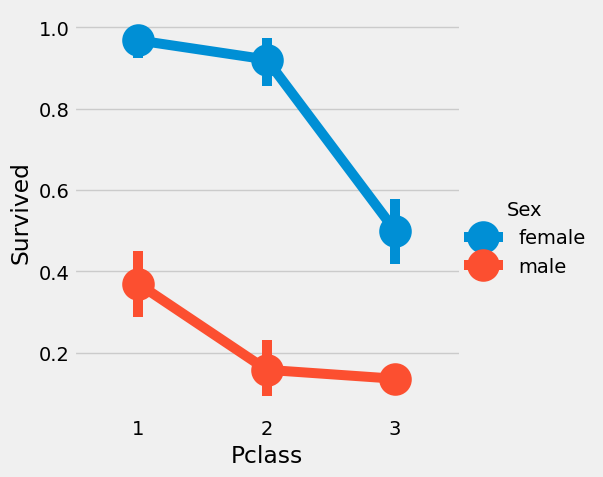

In [11]:
# factorplot() deprecated, use catplot() instead
# default value is strip, so change to kind='point' if needed

sns.catplot(x = 'Pclass',y = 'Survived', hue='Sex', data=data, kind='point')
plt.show()

In [12]:
# continuous feature 

print('Oldest passenger was', data['Age'].max(), 'years old')
print('Youngest passenger was', data['Age'].min(), 'years old')
print('Average passenger age was', data['Age'].mean(), 'years old')

Oldest passenger was 80.0 years old
Youngest passenger was 0.42 years old
Average passenger age was 29.69911764705882 years old


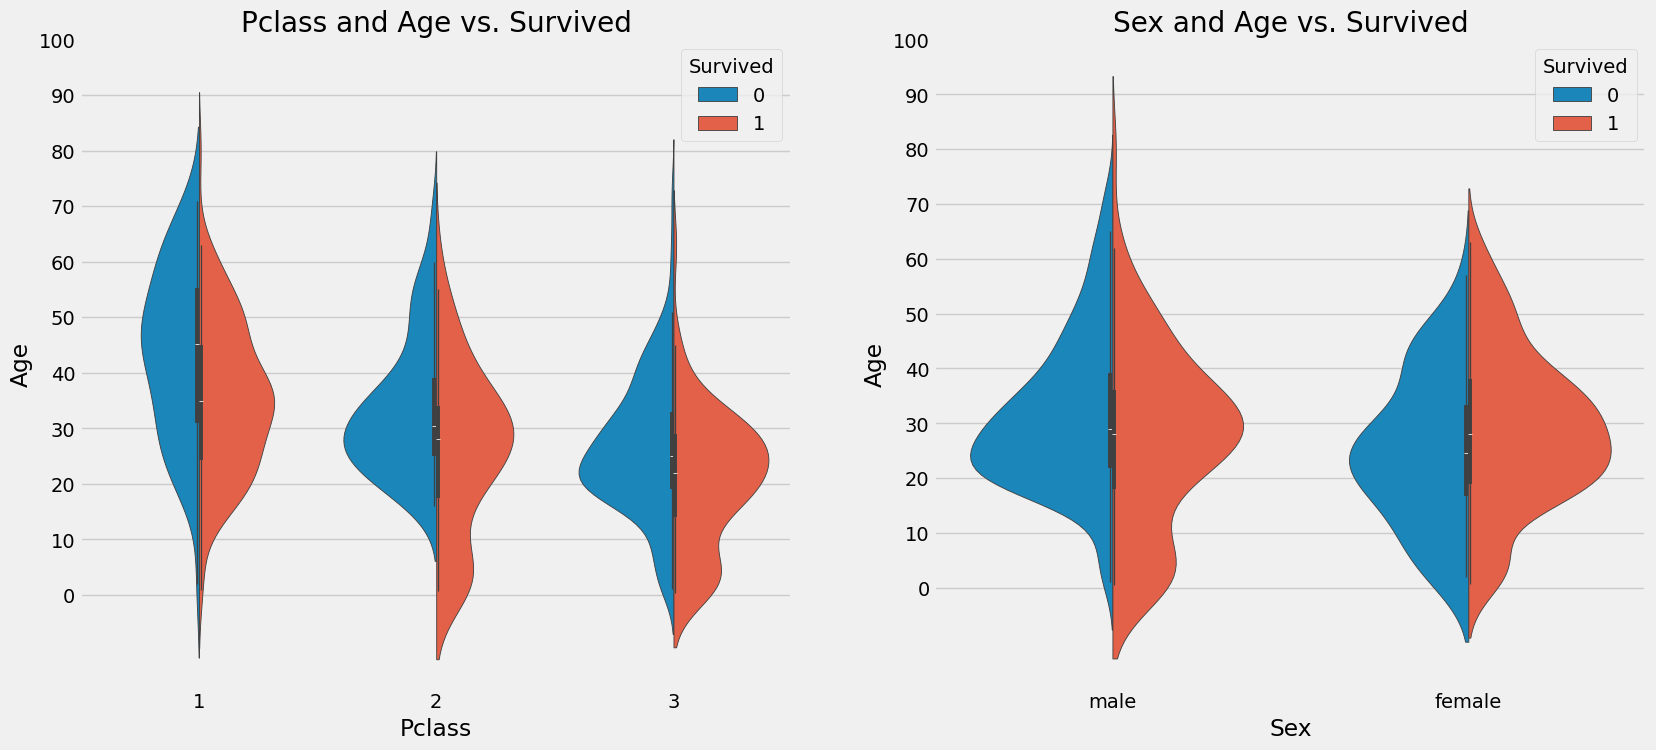

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass", y ="Age", hue="Survived", data = data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x ="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs. Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

In [14]:
# looking for name salutation to fill age null values
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient()

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [19]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

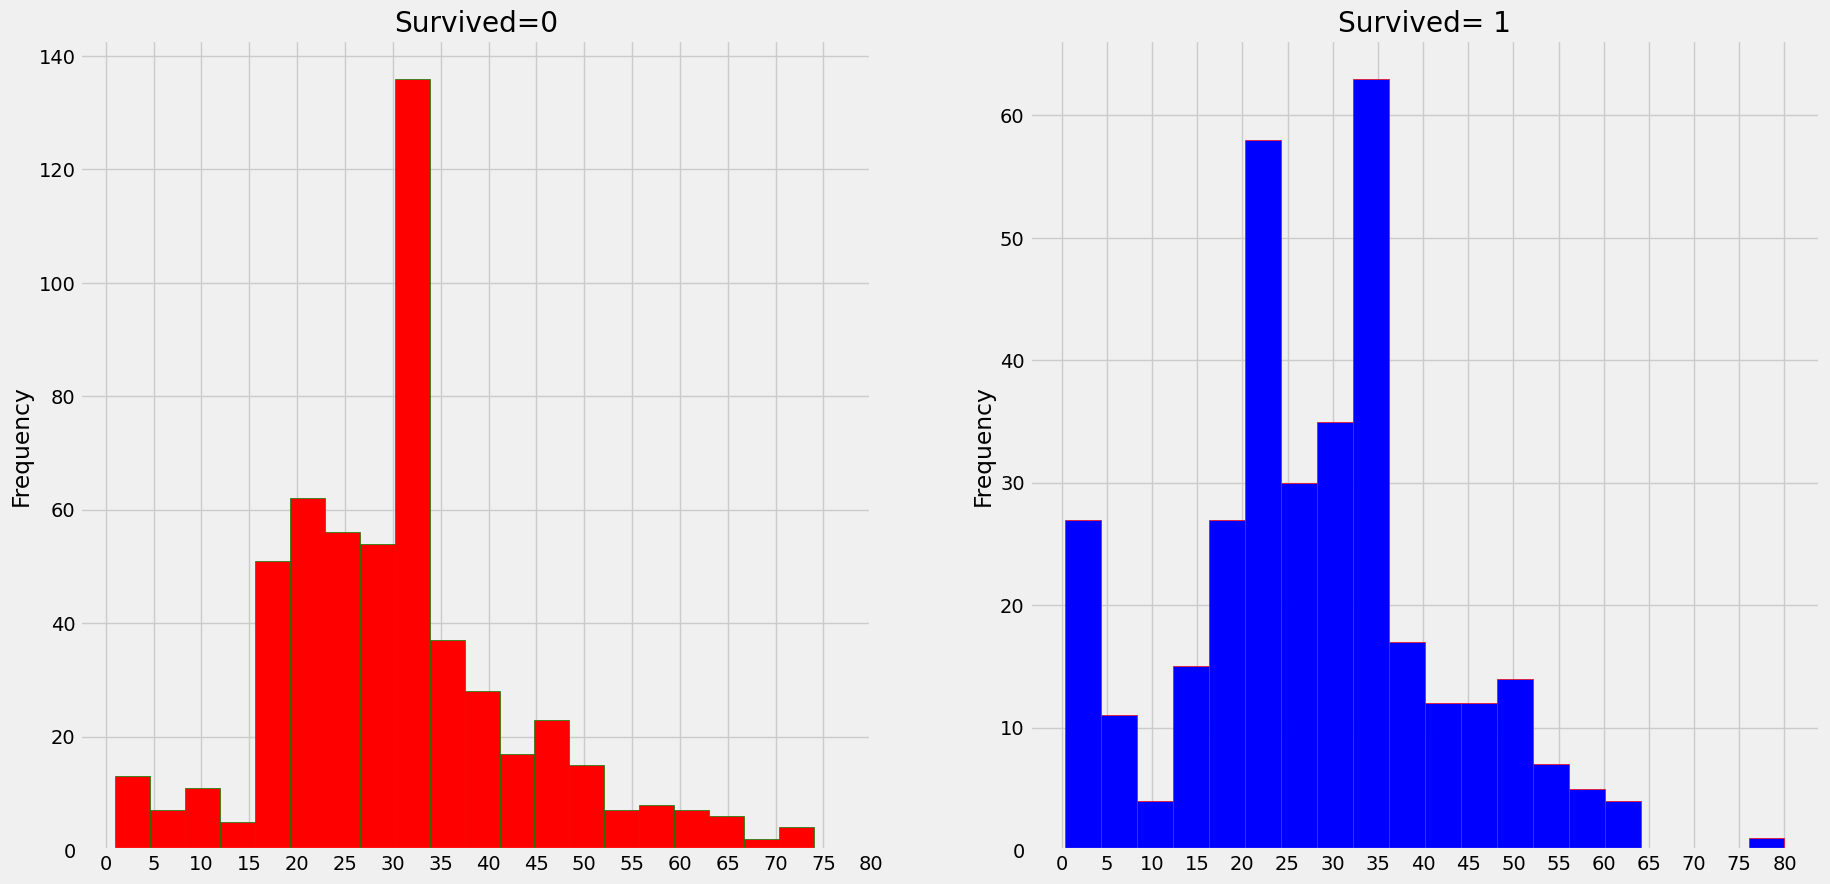

In [20]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='green', color = 'red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='blue', bins=20, edgecolor='red')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

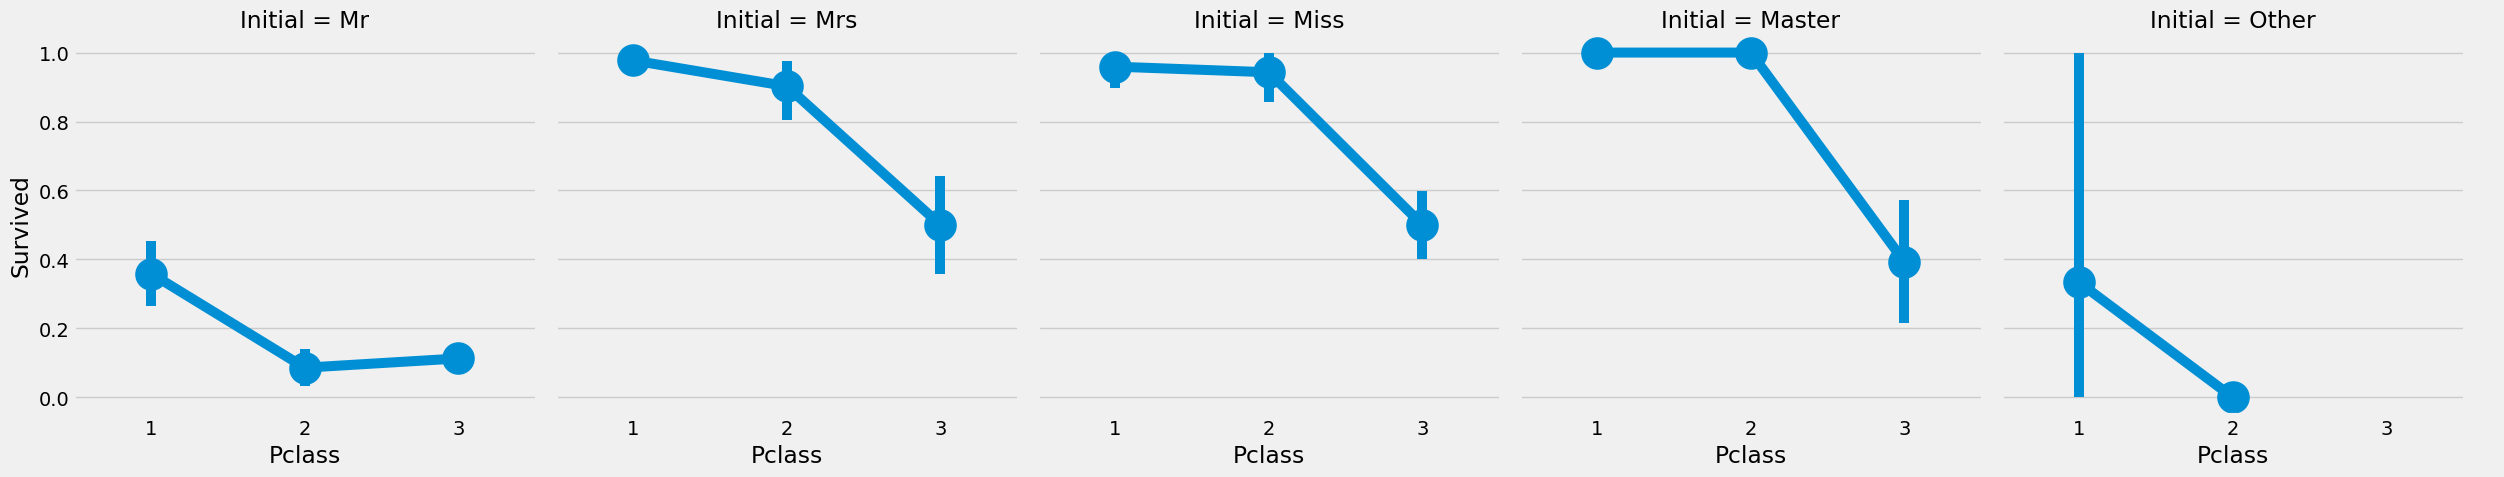

In [21]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

In [22]:
# chances for survival by port of embarkation
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient()

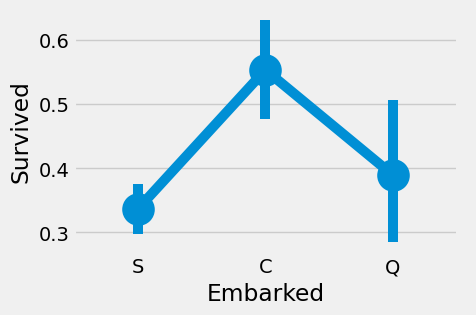

In [23]:
sns.catplot(x='Embarked',y='Survived', data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

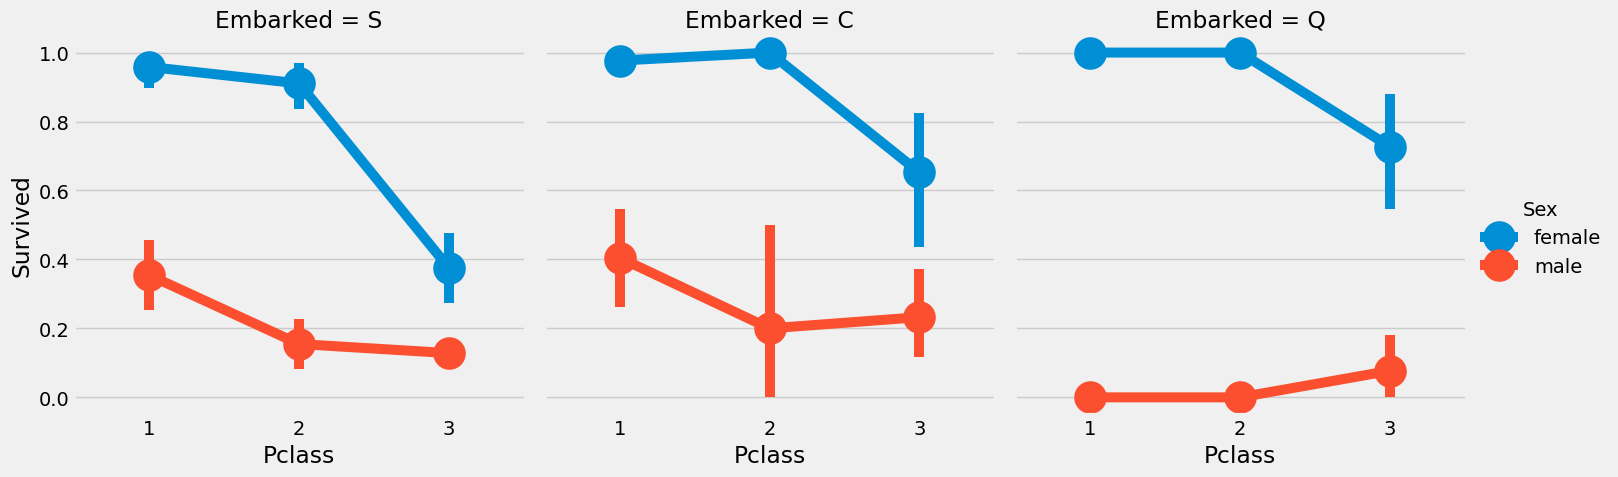

In [24]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', col = 'Embarked', data=data, kind='point')

In [25]:
# maximum passengers were boarded from Port S.
data['Embarked'].fillna('S',inplace=True)

In [26]:
data.Embarked.isnull().any()

np.False_

In [27]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient()

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


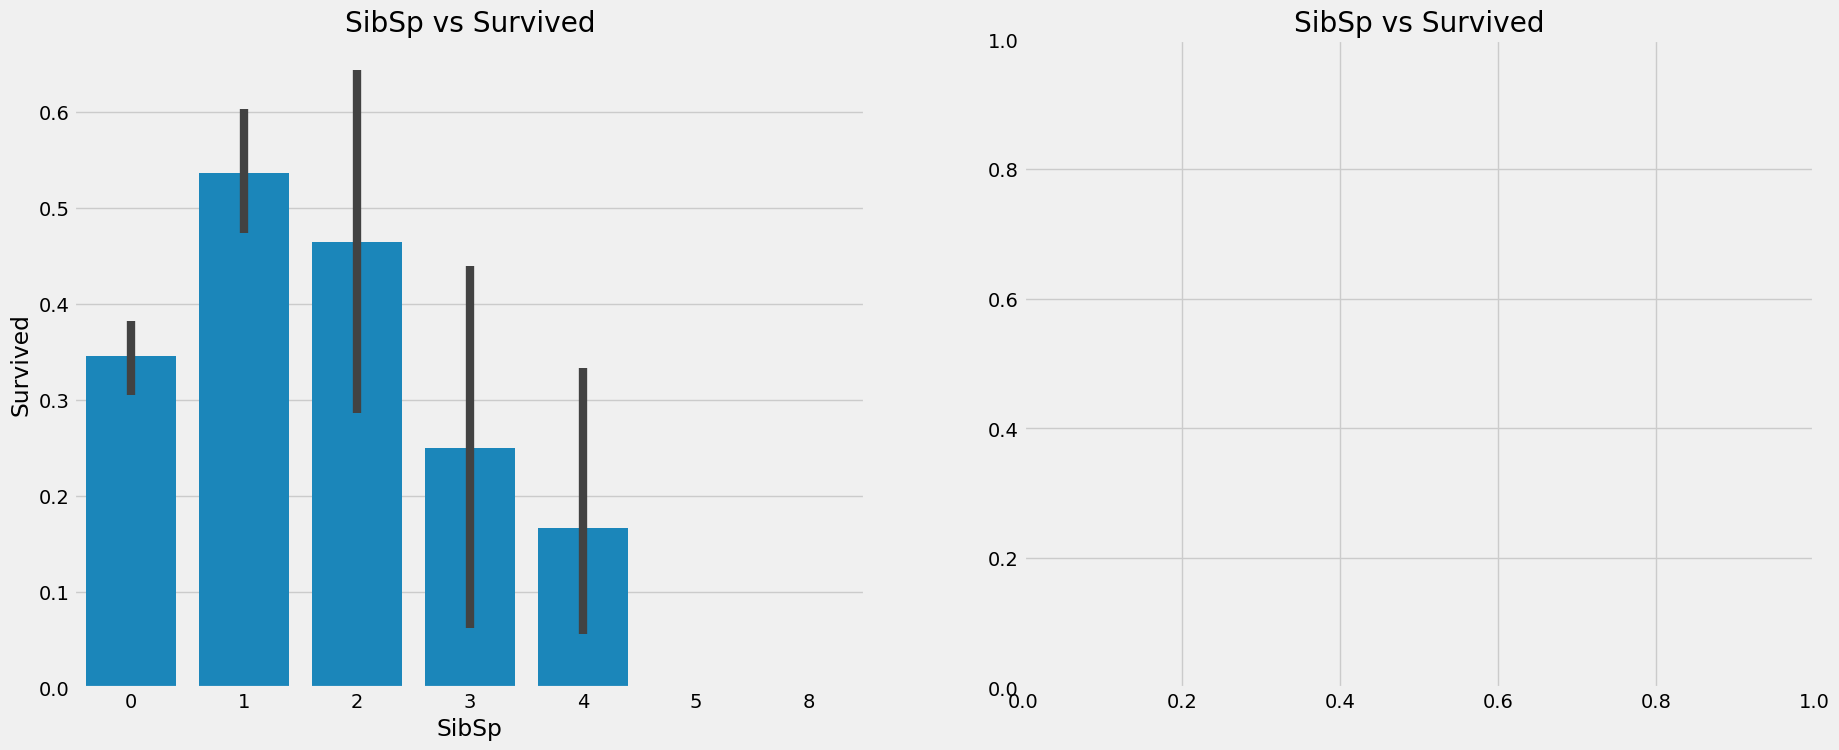

In [28]:
# try to fix it later 
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x = 'SibSp',y ='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [29]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient()

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient()

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs. Survived')

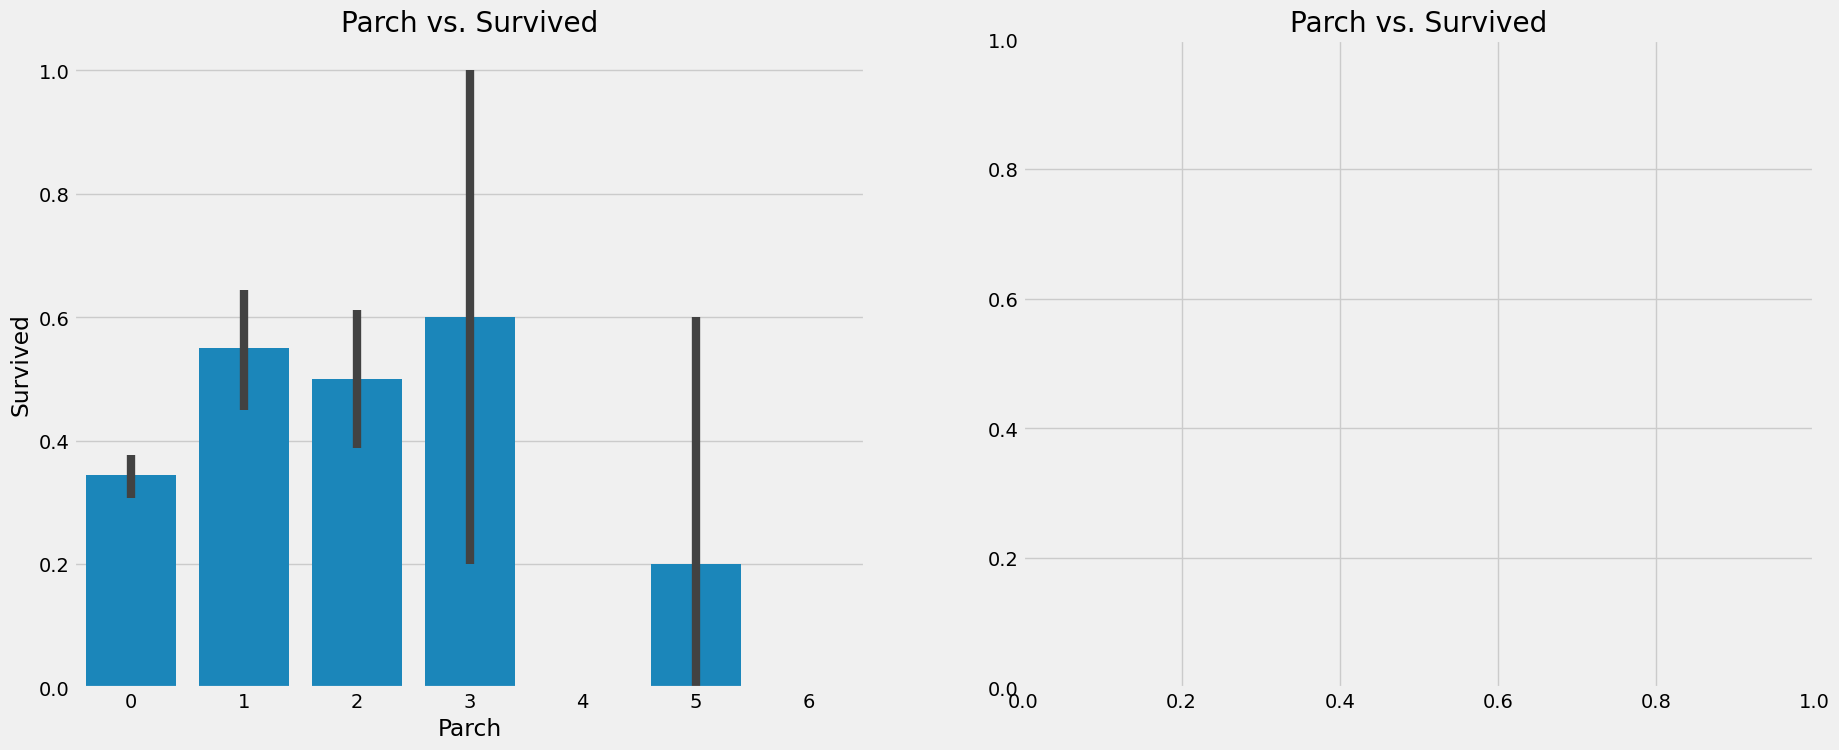

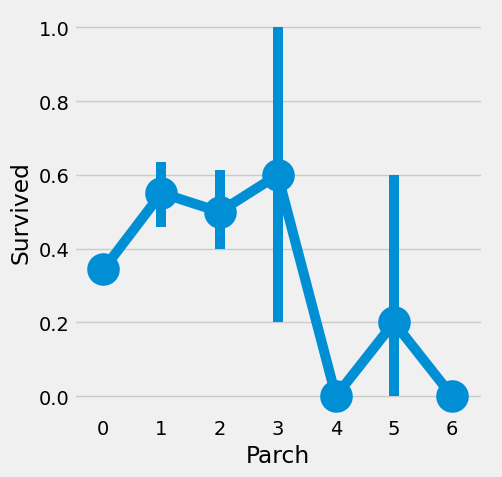

In [42]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs. Survived')
sns.catplot(x='Parch', y = 'Survived', data=data, ax=ax[1],kind='point')
ax[1].set_title('Parch vs. Survived')
# plt.close(2)
# plt.show()



In [ ]:
# code referred from below
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic